In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
data=pd.read_csv('./Inputs/supply_chain_data.csv')

#### Analisis exploratorio de los datos

##### La variable a predecir sera Cost

In [83]:
data.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [84]:
data.drop('SKU',axis=1,inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    object 
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    object 
 11  Shipping costs           100 non-null    float64
 12  Supplier name            100 non-null    object 
 13  Location                 100 non-null    object 
 14  Lead time                10

In [86]:
data.describe()

Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0.000000    1.000000          1.000000        1.000000   
25%       16.750000    8.000000         26.000000        3.750000   
50%       47.500000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.250000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      100.000000  100.000000          100.000000   
mean         5.548149   17.080000          567.840000   
std          2.651376    8.846251          263.046861   
min          1.013487    1.000000          104.000000   
25%          3.540248   10.000000          352.000000   
50%          5.320534   18.000000          568.500000   
75%          7.601695   25.000000          797.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count                100.00000           100.000000    100.000000  100.000000  
mean                  14.77000            47.266693      2.277158  529.245782  
std                    8.91243            28.982841      1.461366  258.301696  
min                    1.00000             1.085069      0.018608  103.916248  
25%                    7.00000            22.983299      1.009650  318.778455  
50%                   14.00000            45.905622      2.141863  520.430444  
75%                   23.00000            68.621026      3.563995  763.078231  
max                   30.00000            99.466109      4.939255  997.413450

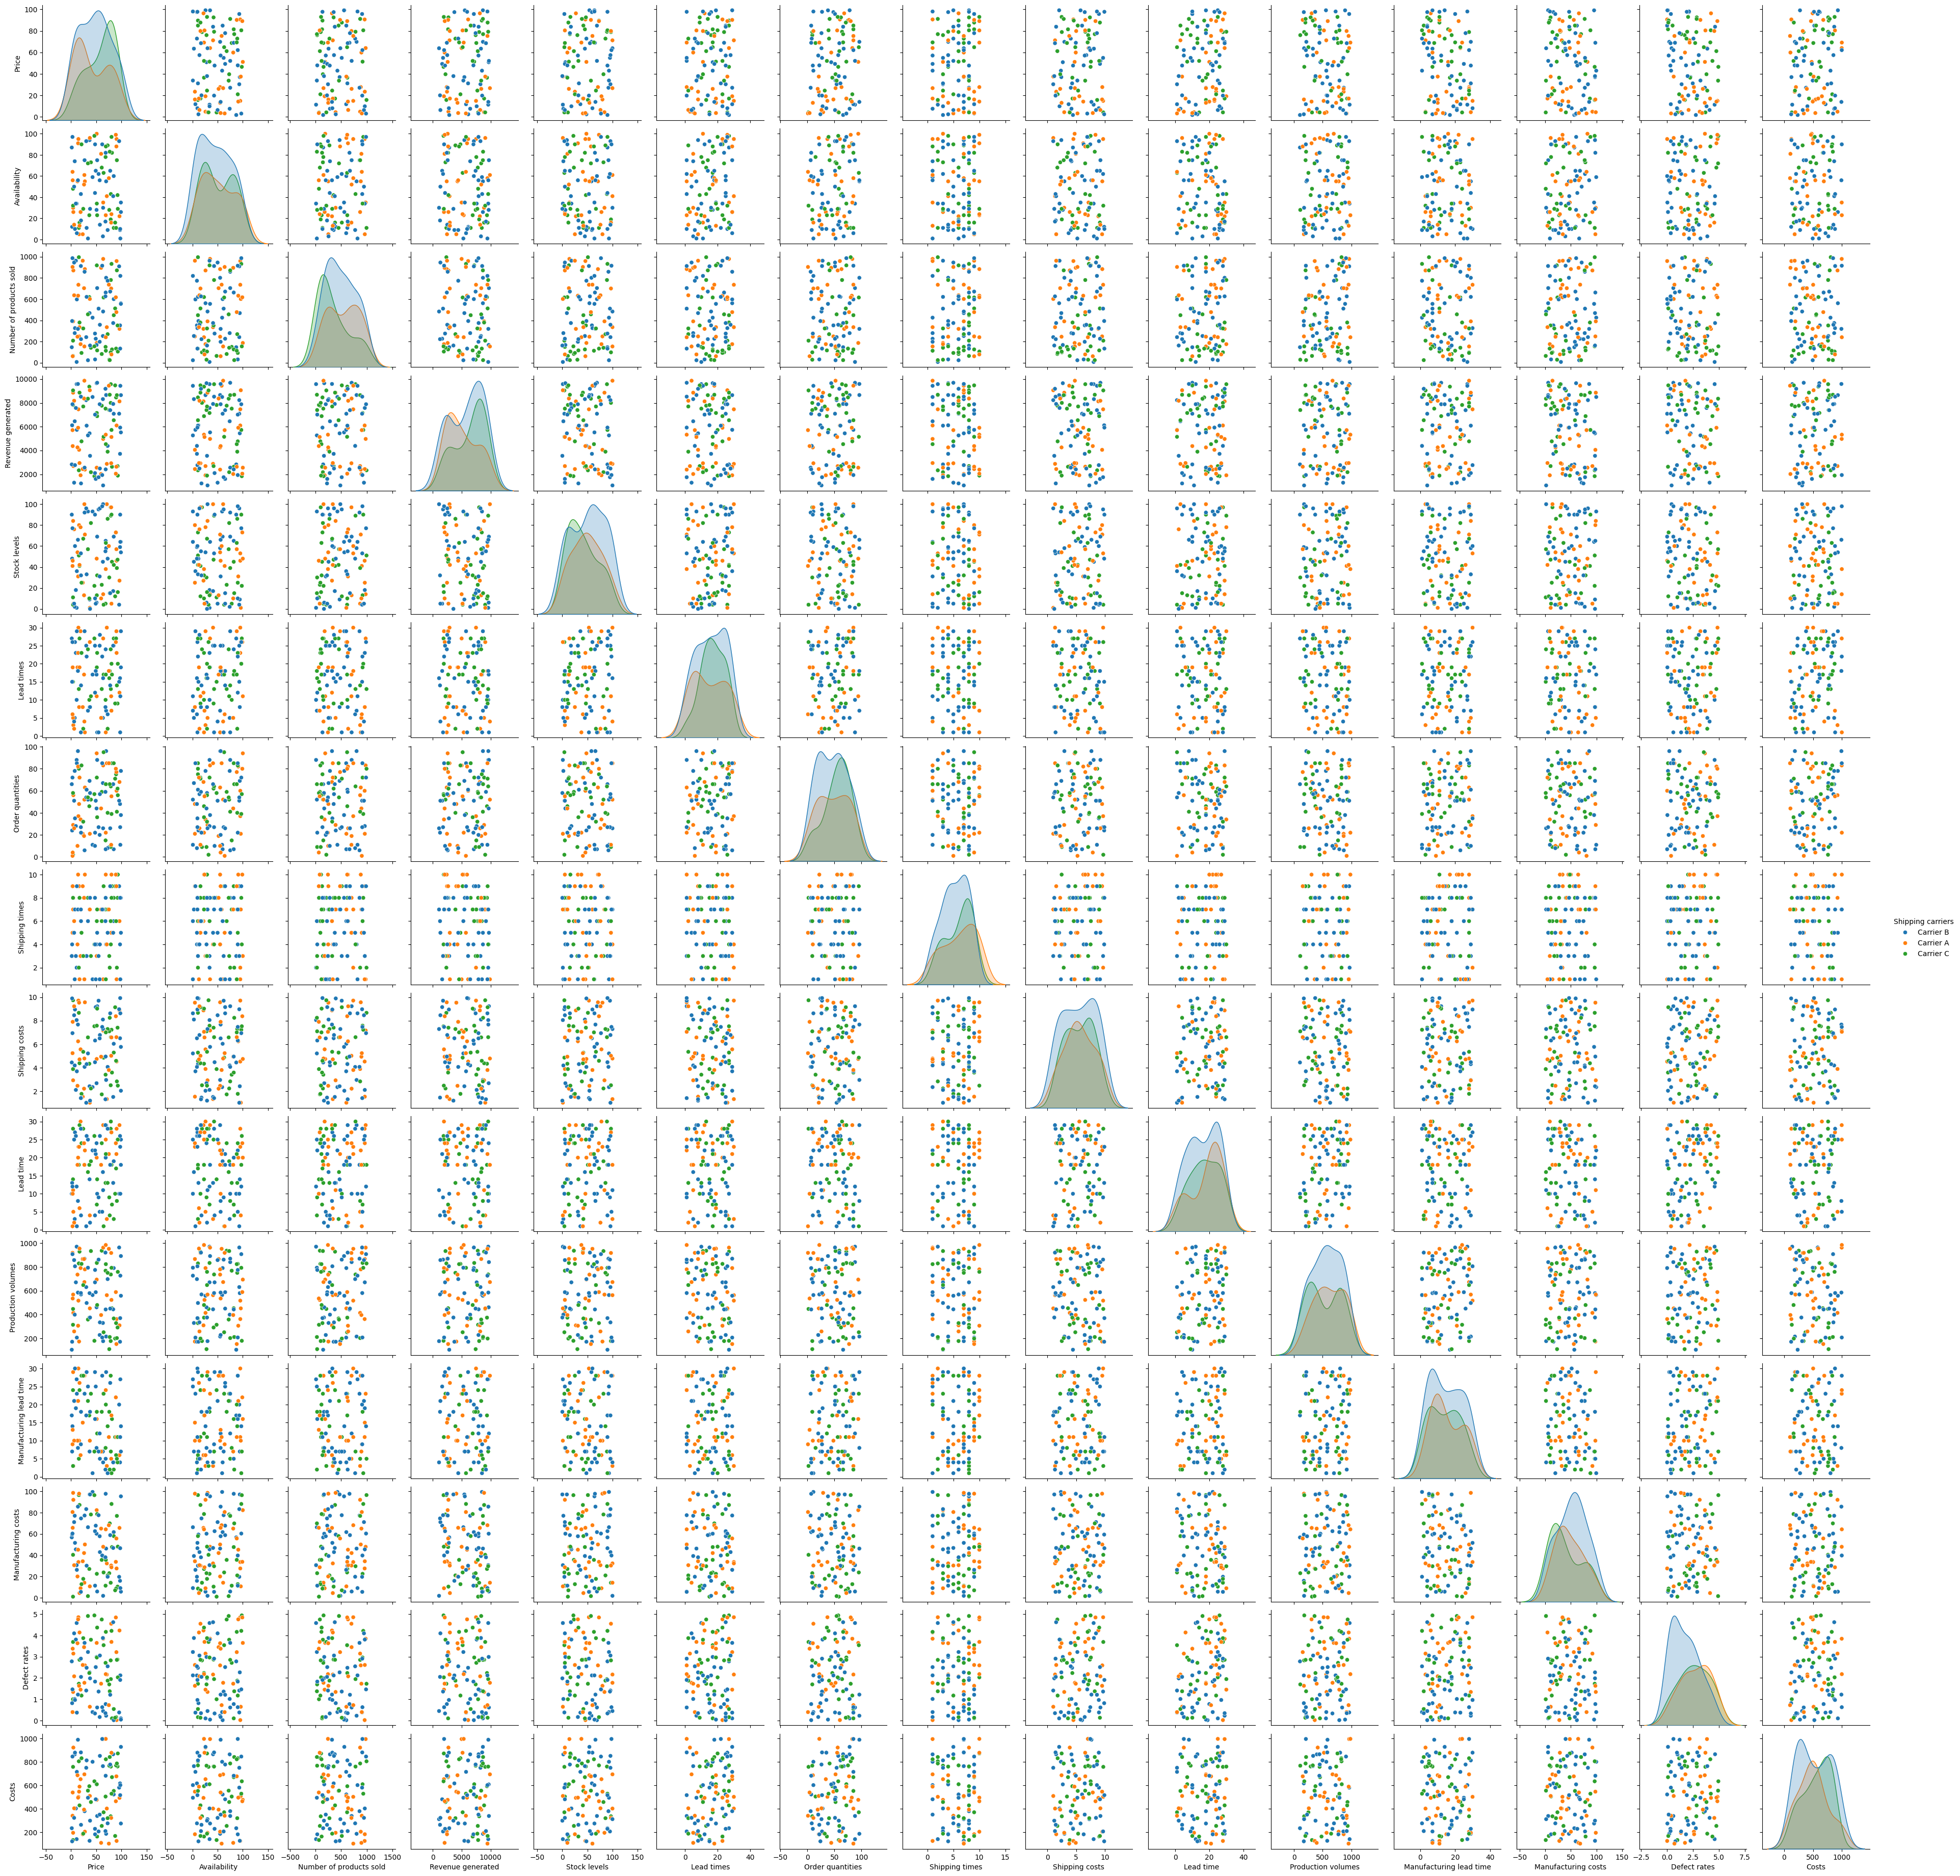

In [41]:
sns.pairplot(data=data, hue='Shipping carriers')

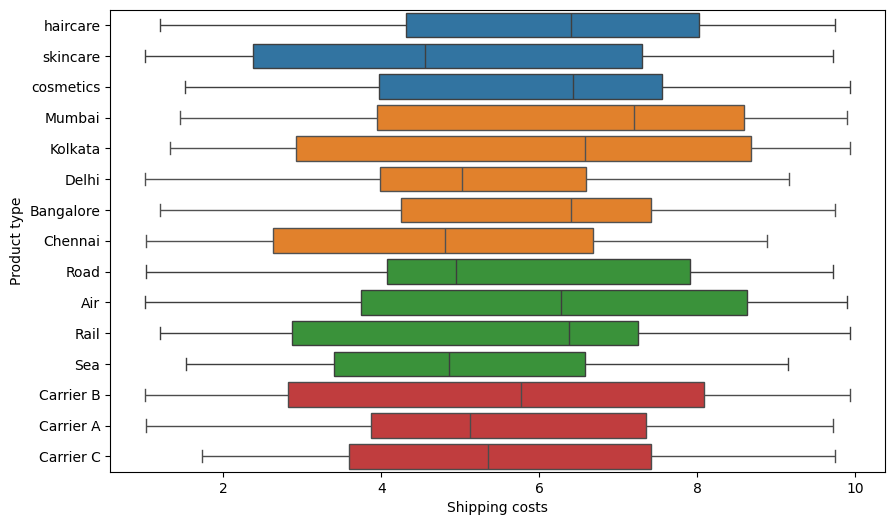

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x='Shipping costs',y='Product type')
sns.boxplot(data=data,x='Shipping costs',y='Location')
sns.boxplot(data=data,x='Shipping costs',y='Transportation modes')
sns.boxplot(data=data,x='Shipping costs',y='Shipping carriers')
plt.show()

In [88]:
obj_cols = data.select_dtypes(include=['object']).columns

# Aplicar get_dummies a las columnas de tipo objeto
data = pd.get_dummies(data, columns=obj_cols)

In [89]:
number_cols = data.select_dtypes(include=['float64','Int64']).columns
data_numbers=data[number_cols].copy()

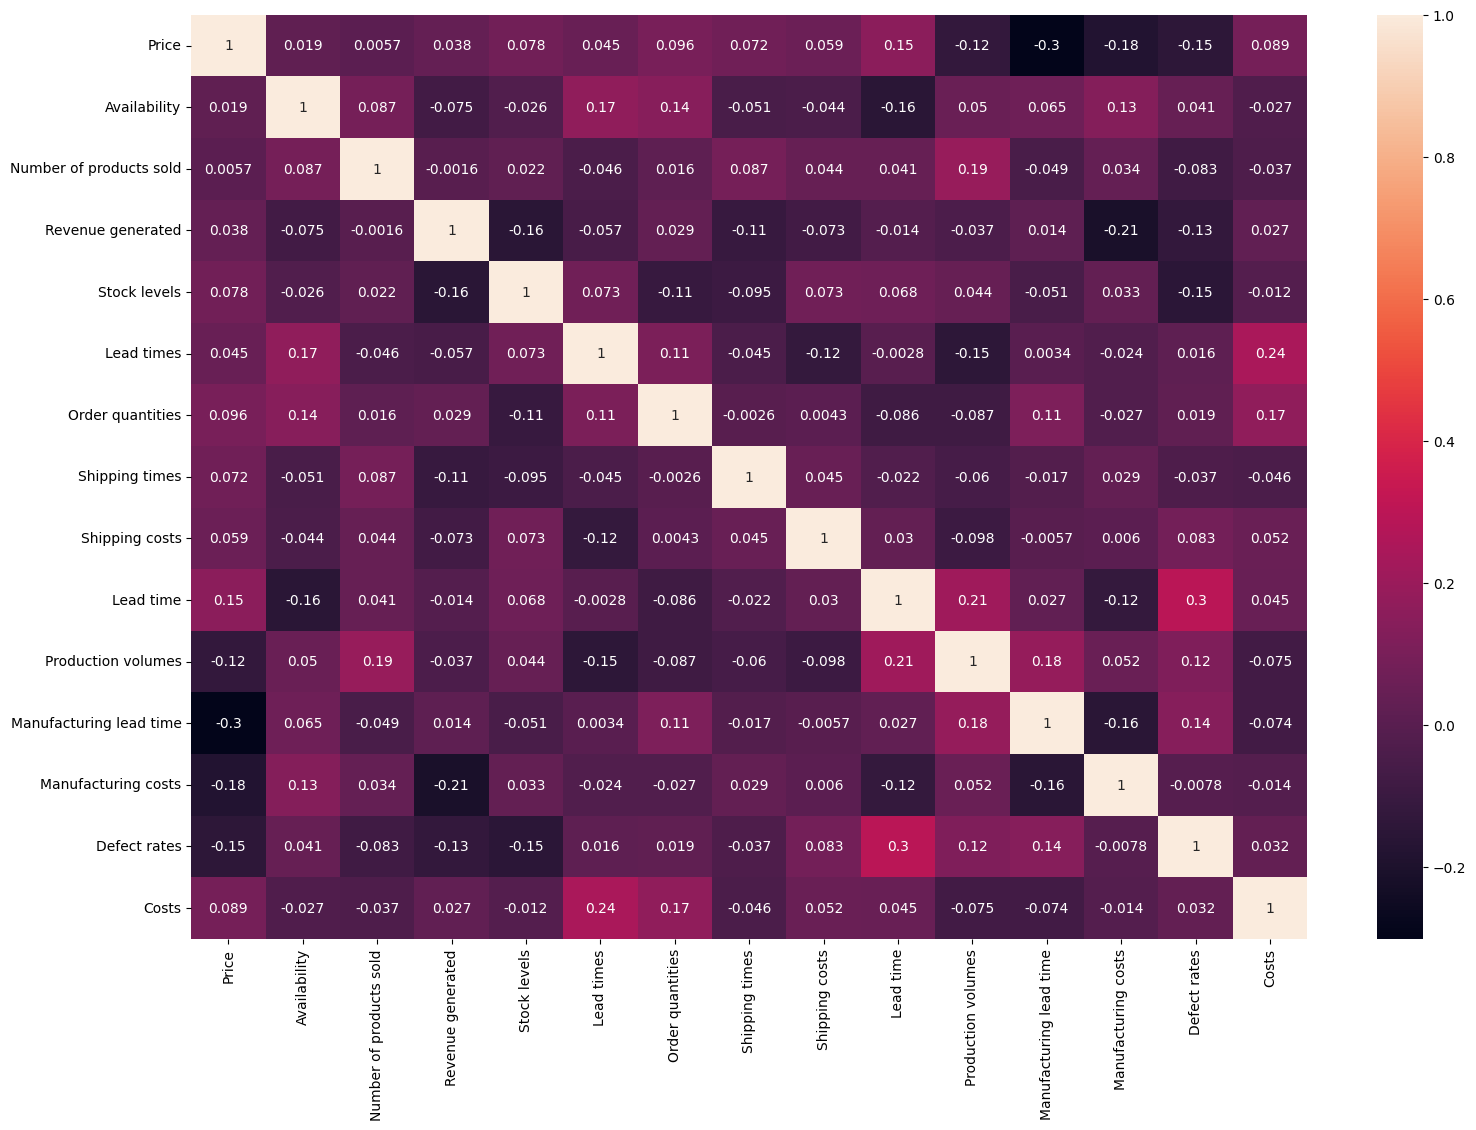

In [90]:
plt.figure(figsize=(18,12))
sns.heatmap(data_numbers.corr(), annot=True)
plt.show()

### Creacion de dataframes de variables independientes y dependientes

In [91]:
X=data.drop('Shipping costs',axis=1)
y=data[['Shipping costs']]

#### Division de dataset en test y entrenamiento

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)

### Entrenamiento del modelo

In [131]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(n_estimators = 15, random_state=0)
regression.fit(X_train,y_train)

c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=15, random_state=0)

### prediccion 

In [132]:
y_train_pred_rf = regression.predict(X_train)
y_test_pred_rf = regression.predict(X_test)

In [133]:
from sklearn.metrics import mean_absolute_error
# obtener predicciones para el conjunto de prueba
# calcular R2
mape_train = mean_absolute_error(y_train, y_train_pred_rf) / abs(y_train).mean() * 100
mape_test = mean_absolute_error(y_test, y_test_pred_rf) / abs(y_test).mean() * 100

# Imprimir los resultados
print('MAPE en el conjunto de prueba es:', mape_test)
print('MAPE en el conjunto de entrenamiento es:', mape_train)

MAPE en el conjunto de prueba es: Shipping costs    46.895841
dtype: float64
MAPE en el conjunto de entrenamiento es: Shipping costs    17.158654
dtype: float64


In [134]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": regression.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

feature  importance
4                       Stock levels    0.099073
0                              Price    0.082312
8                          Lead time    0.077919
13                             Costs    0.069131
12                      Defect rates    0.068599
9                 Production volumes    0.065218
11               Manufacturing costs    0.058986
6                   Order quantities    0.051527
10           Manufacturing lead time    0.051276
2            Number of products sold    0.046577
3                  Revenue generated    0.045455
5                         Lead times    0.041953
1                       Availability    0.035658
16             Product type_skincare    0.023840
7                     Shipping times    0.023352
18        Customer demographics_Male    0.017498
37          Transportation modes_Air    0.016473
30                  Location_Chennai    0.012783
20     Customer demographics_Unknown    0.011412
27          Supplier name_Supplier 4    0.010987
33                   Location_Mumbai    0.010835
34           Inspection results_Fail    0.010056
19  Customer demographics_Non-binary    0.007037
15             Product type_haircare    0.006789
23       Shipping carriers_Carrier C    0.006106
22       Shipping carriers_Carrier B    0.005688
31                    Location_Delhi    0.005675
17      Customer demographics_Female    0.005310
24          Supplier name_Supplier 1    0.005050
14            Product type_cosmetics    0.005011
41                    Routes_Route A    0.004299
26          Supplier name_Supplier 3    0.003440
29                Location_Bangalore    0.003280
43                    Routes_Route C    0.003202
42                    Routes_Route B    0.002442
39         Transportation modes_Road    0.001783
40          Transportation modes_Sea    0.001006
36        Inspection results_Pending    0.000839
38         Transportation modes_Rail    0.000700
28          Supplier name_Supplier 5    0.000570
35           Inspection results_Pass    0.000375
21       Shipping carriers_Carrier A    0.000328
25          Supplier name_Supplier 2    0.000092
32                  Location_Kolkata    0.000058